# Beta code # 
## Extracting  ##

In [4]:
## load depedencies 
import numpy as np # math library
import cv2 # visual computational 
import matplotlib.pyplot as plt # vizualization
import os # directory management
from configobj import ConfigObj # load rules
import lossrun

## Load files, points of interest and rules ##

In [5]:
## Read raw txt info in pdf report

PATH_txt = os.path.join('.','data','txt','')
PATH_image = os.path.join('.','data','images','')

# pdf raw file no ext 
# input file name


#__________________________________________________
pdf_file = 'A-MMED 2017 Pioneer loss runs PIO-YES0'
#___________________________________________________


#  Read text file 
txt_file = PATH_txt + pdf_file + '.txt'
#image file
image_file = PATH_image + pdf_file + '.jpg'

# Read as dict format txt file
txt_dict = lossrun.read_dict(txt_file)

# load configuration file prototype
data_ponts = ConfigObj('config_file.ino')



## Get the rules in the report ##

In [6]:
points_of_interest = lossrun.search_rules(txt_dict, data_ponts)
points_of_interest

[('insurer', 'CARRIER', 28, 944, 66),
 ('insured', 'PREPARED FOR', 21, 235, 67),
 ('insured', 'CLAIMANT', 211, 1143, 819),
 ('insured', 'CLAIMANT', 244, 329, 426),
 ('valued date', 'AS OF', 62, 267, 174),
 ('loss date', 'DATE OF LOSS', 104, 556, 427),
 ('reported date', 'DATE', 100, 752, 394),
 ('status', 'STATUS', 108, 879, 426),
 ('expense paid', 'EXPENSE', 101, 1345, 398),
 ('indemnity paid', 'INDEMNITY', 102, 1489, 398),
 ('broker', 'BROKER', 124, 1241, 470)]

## Visualizate the data ##  

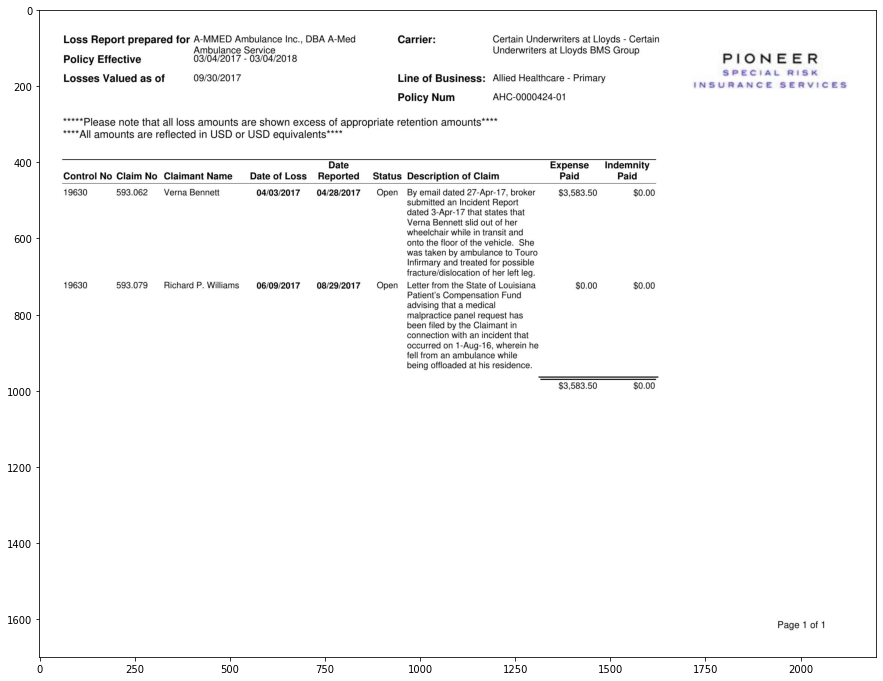

In [7]:
## read image
_image = cv2.imread(image_file)

# vis data point choords
#cv2.circle(_image, (points_of_interest[0][2], points_of_interest[0][3]),50, 10)
plt.figure(figsize = (15,13))
plt.imshow(_image)

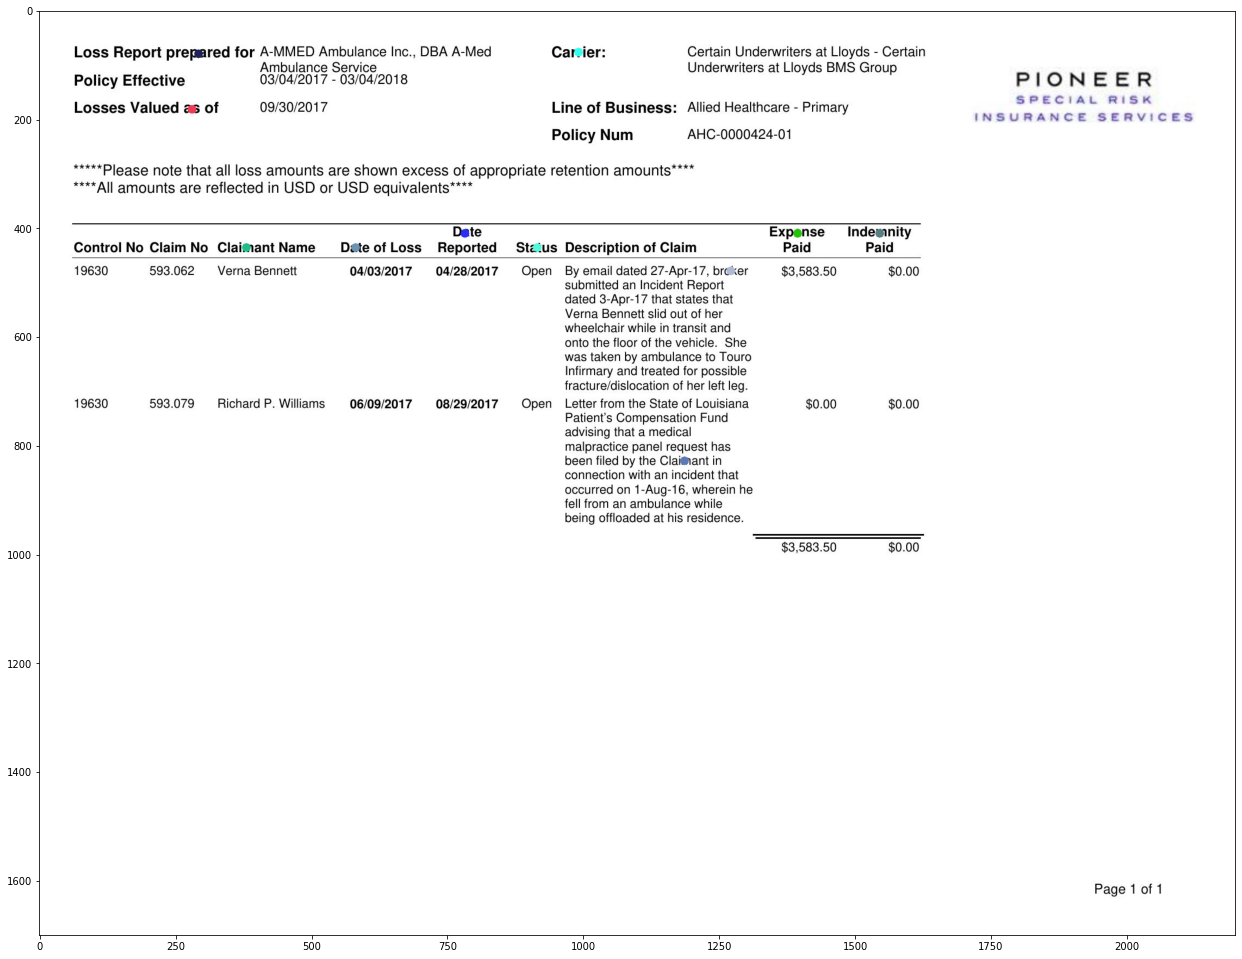

In [28]:
import random

# load report image
_image = cv2.imread(image_file)

# crea la lista vacia 
all_candidates = []

# check all spatial relation for the targets filtered
for i in range(len(points_of_interest)):
    
    # get the box dimentions
    (l, t, w, h) = (txt_dict['left'][points_of_interest[i][2]],
                txt_dict['top'][points_of_interest[i][2]],
                txt_dict['width'][points_of_interest[i][2]],
                txt_dict['height'][points_of_interest[i][2]]
                )


    # define random colors for each target
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    
    #Create a circle for each target
    cv2.circle(_image, ( l+ np.uint8(w/2), t + np.uint8(h/2)),8,(r,g,b),-1)

    # search in vertical and horizontal way 
    vertical_candidates = []
    horizontal_candidates = []

    #search the data
    for i in range(len(txt_dict['text'])):
        
        # if text is in same column
        if (txt_dict['left'][i] > l - w/2 and txt_dict['left'][i] < l + w/2 and txt_dict['top'][i] > t):
            vertical_candidates.append(txt_dict['text'][i])

        # if text is in same row
        if (txt_dict['top'][i] > t - h/2 and txt_dict['top'][i] < t + h/2 and txt_dict['left'][i] > l):
            horizontal_candidates.append(txt_dict['text'][i])

    # join all candidates            
    all_candidates +=  [vertical_candidates + horizontal_candidates]

plt.figure(figsize=(23,17))
plt.imshow(_image)       

In [9]:
# Manual inspection for spatial search
 
import re
import configobj
rules = ConfigObj('config_rules_proto.ino')
import spacy
from spacy import displacy

# grammar kernel
nlp = spacy.load("en_core_web_sm")

#----------
topic = 0 # topic of search
# i.e., topic 1 = Carrier, topic 2 = Insured, etc.
#----------

# extract the sentence asociate to the topic
sentence = u' '.join(all_candidates[:][topic])

doc = nlp(sentence)

print('searching for topic: ' + points_of_interest[topic][1])
print('.'*50)
for token in doc:
    print(token.text, token.tag_)
#displacy.serve(doc, style='ent')

# revisa a partir de los resultados de la busqueda
#for i, j in enumerate(points_of_interest):
    
#    print('data point is: '+ j[0] + ' searchin for: ' + str(rules[j[0]]))
    #print('in ',' '.join(all_candidates[:][i]))
 #   print('_'*30)
 #   string = ' '.join(all_candidates[:][i])
 #   re.findall(str(rules[j[0]]), string)
 #   doc = nlp(string)
 #   displacy.serve(doc, style="ent")

     #   print('here')
    

searching for topic: CARRIER
..................................................
  _SP
Line NNP
of IN
  _SP
Policy NNP
Num NNP
retention NN
Status NN
Description NN
Open JJ
By IN
email NN
  _SP
submitted VBD
  _SP
dated VBN
3-Apr-17 NN
  _SP
Verna NNP
Bennett NNP
  _SP
wheelchair NN
  _SP
onto IN
the DT
  _SP
was VBD
taken VBN
  _SP
Infirmary NNP
  _SP
fracture NN
/ SYM
dislocation NN
Open NNP
Letter NNP
from IN
  _SP
Patient NNP
's POS
  _SP
advising VBG
  _SP
malpractice NN
  _SP
been VBN
filed VBN
  _SP
connection NN
  _SP
occurred VBD
  _SP
fell VBD
from IN
  _SP
being VBG
offloaded VBN
    _SP
Certain NNP
Underwriters NNS
at IN
Lloyds NNP
- HYPH
Certain NNP


In [10]:
points_of_interest

[('insurer', 'CARRIER', 28, 944, 66),
 ('insured', 'PREPARED FOR', 21, 235, 67),
 ('insured', 'CLAIMANT', 211, 1143, 819),
 ('insured', 'CLAIMANT', 244, 329, 426),
 ('valued date', 'AS OF', 62, 267, 174),
 ('loss date', 'DATE OF LOSS', 104, 556, 427),
 ('reported date', 'DATE', 100, 752, 394),
 ('status', 'STATUS', 108, 879, 426),
 ('expense paid', 'EXPENSE', 101, 1345, 398),
 ('indemnity paid', 'INDEMNITY', 102, 1489, 398),
 ('broker', 'BROKER', 124, 1241, 470)]

In [ ]:
import spacy
from spacy import displacy
topic = 9

sentence = ' '.join(all_candidates[:][topic])
print('searching for topic: ' + points_of_interest[topic][1])
print('in: ' + sentence)



nlp = spacy.load('en')

labelel = nlp(sentence)

displacy.serve(labelel, style='ent')


In [12]:
candidate = 0
print('searching: ' + points_of_interest[0][1] + ' in: ' + ' '.join(all_candidates[:][0]))

searching: CARRIER in:  Line of  Policy Num retention Status Description Open By email  submitted  dated 3-Apr-17  Verna Bennett  wheelchair  onto the  was taken  Infirmary  fracture/dislocation Open Letter from  Patient's  advising  malpractice  been filed  connection  occurred  fell from  being offloaded    Certain Underwriters at Lloyds - Certain


In [13]:
## manual cell to define entities new model for spacy 

string = ' '.join(all_candidates[:][0])
print(string)
string.index('3-A')
string[82:90]

Line of  Policy Num retention Status Description Open By email  submitted  dated 3-Apr-17  Verna Bennett  wheelchair  onto the  was taken  Infirmary  fracture/dislocation Open Letter from  Patient's  advising  malpractice  been filed  connection  occurred  fell from  being offloaded    Certain Underwriters at Lloyds - Certain


'3-Apr-17'

In [14]:
# Create Manual data

In [15]:
TRAIN_DATA = [
    (string,{'entities':[(82,89,'DATE')]})
]

nlp = spacy.blank('en')
optimizer = nlp.begin_training()

for i in range(20):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-15-5d8f348e3b5c>, line 9)

In [16]:
doc = nlp(string.lower())

displacy.serve(doc, style='ent')


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
